#**Topic:** Study of Video Game Sales in Different Regions

**Objectives:**

1. Examine the number of games released each year to identify trends and changes in game launches over time.

2. Display the sales of games by genre for each region.

3. Analyze the distribution of games by platform to understand which platforms have the most dominant games.

4. Analyze the distribution of games by genre.

5. The dataset used for this study was obtained from Kaggle.

**Dataset**:
https://www.kaggle.com/datasets/anandshaw2001/video-game-sales

**Features:**

Ranking – bold textThe rank of the game.

Name –The name of the game.

Platform – The platform on which the game was released (PC, PS4, etc.).

Year – The year the game was launched.

Genre – The genre of the game.

Publisher – The publisher of the game.

NA_SALE – Sales in North America (in millions).

EU_SALE - Sales in Europe (in millions).

JP_SALE – Sales in Japan (in millions).

OTHER_SALE – Sales in other parts of the world (in millions).

GLOBAL_SALE – Total global sales (includes all regional sales of the game).

In [ ]:
#Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb # as sns

In [ ]:

from google.colab import files
uploaded = files.upload()

Saving vgsales.csv to vgsales.csv


In [ ]:
#Accessing the data stored in vgsales.csv
game_data = pd.read_csv('vgsales.csv')

In [ ]:
#To get information about the downloaded file, we used .info(), which displays the number of columns, data types, non-null values, etc.
#As seen below, this file contains 11 columns, most of which are numerical (float/int), and also some of type object.
#Regarding the non-null values, we can observe that two columns have fewer non-null values compared to the others.
game_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [ ]:
#This dataset consists of 16,598 rows and 11 columns.
game_data.shape

(16598, 11)

In [ ]:
#We check for duplicate values and remove any duplicates, keeping only the first occurrence.
game_data.drop_duplicates(inplace=True, keep='first')

In [ ]:
#To determine how many null values exist, the following command was used.
#As a result, we can see that the Year column has 271 null values and the Publisher column has 58 null values.
print(game_data.isnull().sum())

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64


In [ ]:
#To avoid leaving null values in the Publisher column, we decided to replace them with 'Unknown',
#so that we don’t lose information and can still identify which games have an unknown publisher.
game_data['Publisher'] = game_data['Publisher'].fillna('Unknown')

In [ ]:
# After filling the null values with 'Unknown', we check if the 'Publisher' column,
# which previously had 58 null values, now has 0 null values.
# As we can see from the result, the 'Publisher' column now has 0 null values.
print(game_data.isnull().sum())


Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher         0
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64


In [ ]:
# Creating a new dataset that includes only the rows which have a value in the 'Year' column.
g_y_clean = game_data[game_data['Year'].notnull()].copy()

In [ ]:
g_y_clean.info()


<class 'pandas.core.frame.DataFrame'>
Index: 16327 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16327 non-null  int64  
 1   Name          16327 non-null  object 
 2   Platform      16327 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16327 non-null  object 
 5   Publisher     16327 non-null  object 
 6   NA_Sales      16327 non-null  float64
 7   EU_Sales      16327 non-null  float64
 8   JP_Sales      16327 non-null  float64
 9   Other_Sales   16327 non-null  float64
 10  Global_Sales  16327 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [ ]:
# Converting the data type of 'Year' from float to int so that we can perform operations/analysis on it
# as a whole number rather than a decimal.
g_y_clean['Year'] = g_y_clean['Year'].astype(int)

In [ ]:
g_y_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16327 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16327 non-null  int64  
 1   Name          16327 non-null  object 
 2   Platform      16327 non-null  object 
 3   Year          16327 non-null  int64  
 4   Genre         16327 non-null  object 
 5   Publisher     16327 non-null  object 
 6   NA_Sales      16327 non-null  float64
 7   EU_Sales      16327 non-null  float64
 8   JP_Sales      16327 non-null  float64
 9   Other_Sales   16327 non-null  float64
 10  Global_Sales  16327 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


In [ ]:
print(g_y_clean.isnull().sum())

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64


## Finding and analyzing outliers


Outliers help us identify if there are games with abnormal sales values that could negatively impact the statistical analysis.

In [ ]:
# Import visualization libraries – seaborn for advanced plotting
# and matplotlib for displaying the charts.
import seaborn as sns
import matplotlib.pyplot as plt

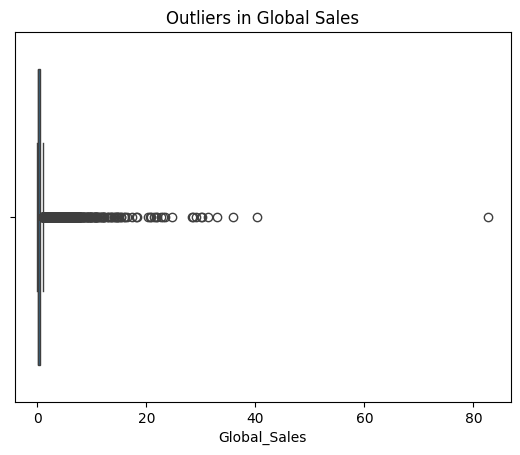

In [ ]:

# Boxplot to visualize outliers in global sales
sns.boxplot(data=game_data, x='Global_Sales')
plt.title('Outliers in Global Sales')
plt.show()

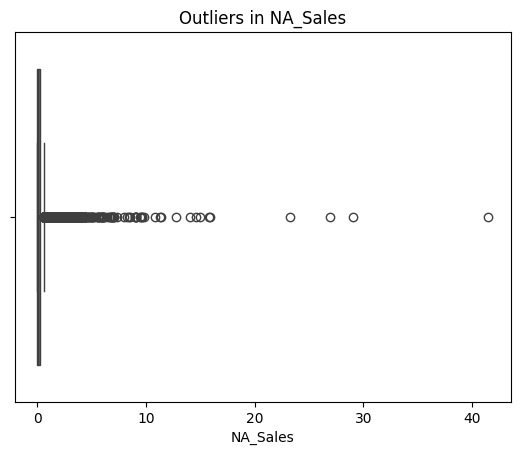

In [ ]:
# Boxplot to visualize outliers in North America sales
sns.boxplot(data=game_data, x='NA_Sales')
plt.title('Outliers in NA_Sales')
plt.show()

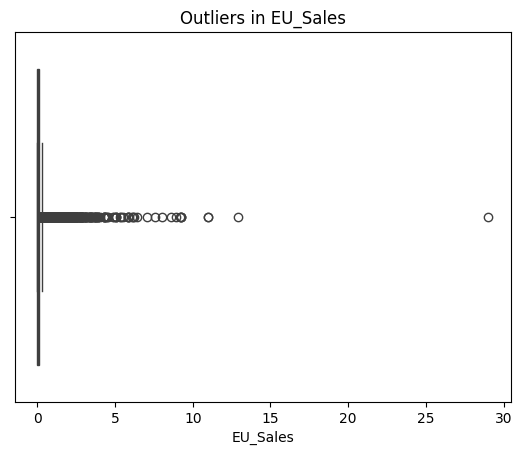

In [ ]:
# Boxplot to visualize outliers in Europe sales
sns.boxplot(data=game_data, x='EU_Sales')
plt.title('Outliers in EU_Sales')
plt.show()

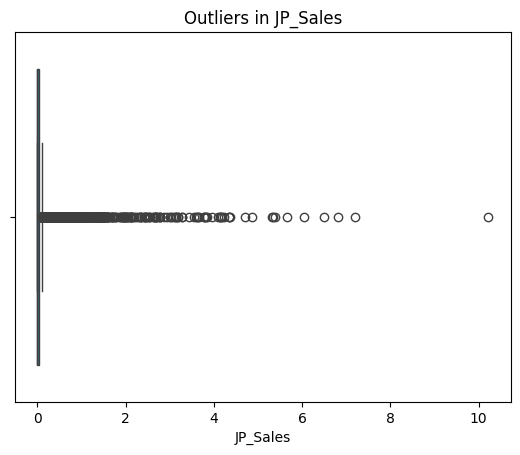

In [ ]:
# Boxplot to visualize outliers in Japan sales
sns.boxplot(data=game_data, x='JP_Sales')
plt.title('Outliers in JP_Sales')
plt.show()

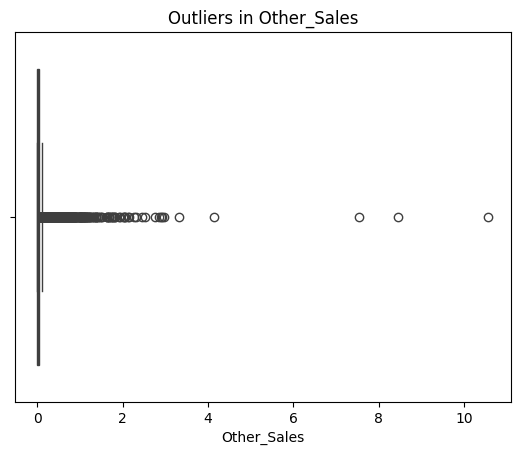

In [ ]:
# Boxplot to visualize outliers in sales from other regions
sns.boxplot(data=game_data, x='Other_Sales')
plt.title('Outliers in Other_Sales')
plt.show()


Since the number of outlier data points is not large, we can keep them in the dataset to maintain data integrity.

#Finding which game has the highest sales

In [ ]:
# Find the index of the game with the highest global sales
max_index = game_data['Global_Sales'].idxmax()

# Get the name of the best-selling game
best_selling_game = game_data.loc[max_index, 'Name']

# Get the maximum sales value
top_sales = game_data.loc[max_index, 'Global_Sales']

# Print the result
print(f"The best-selling game is: {best_selling_game} with total sales of: {top_sales} million units.")



The best-selling game is: Wii Sports with total sales of: 82.74 million units.


# Finding the unique values by grouping them by name.

In [ ]:
# This is useful since the name will be included in the following analyses.

unique_values = game_data['Name'].unique()
a = len(unique_values)
print(a)

11493


From the result above, we can see that there are 11,493 unique game names out of a total of 16,598.
One reason for this repetition is that the same game might have been released on multiple platforms.
Therefore, there is one row per platform.


#Percentage of games released per platform

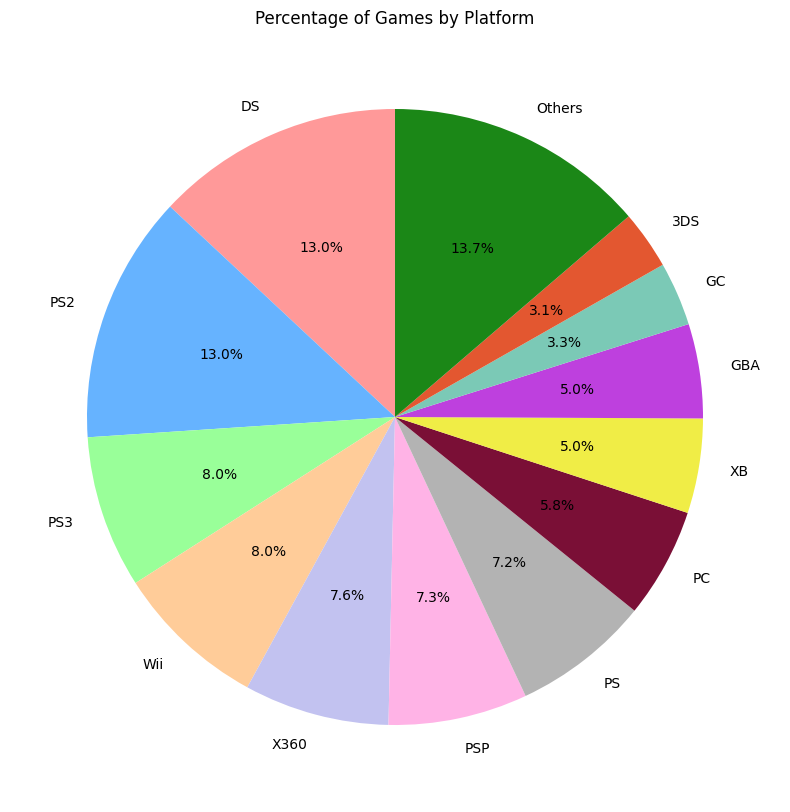

In [ ]:
# Find the number of games for each platform
platform_game_counts = game_data['Platform'].value_counts()

# Find the total number of games
total_games = len(game_data)

# Calculate the percentage of games for each platform
platform_game_percentage = (platform_game_counts / total_games) * 100

# Identify platforms that have less than 3% and group them under "Others"
others_percentage = platform_game_percentage[platform_game_percentage < 3].sum()

# Remove platforms that have less than 3% from the list
platform_game_percentage = platform_game_percentage[platform_game_percentage >= 3]

# Add an "Others" category for platforms with less than 3%
platform_game_percentage['Others'] = others_percentage

# Create a pie chart
plt.figure(figsize=(10, 10))
colors = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99', '#C2C2F0', '#FFB3E6', '#B3B3B3',
          '#7a0f36', '#f0ed46', '#be40de', '#7bc9b6', '#e35730', '#1b8717']
plt.pie(platform_game_percentage, labels=platform_game_percentage.index, autopct='%1.1f%%',
        startangle=90, colors=colors)

# Chart title
plt.title('Percentage of Games by Platform')

# Display the chart
plt.show()


The chart provides a clear view of the dominance of major platforms in the gaming industry. The "Others" category shows that there are smaller platforms that also contribute to the market, but with a smaller share. This indicates that while some platforms dominate, smaller ones still have a certain, though limited, presence in the market.

# Top 10 best-selling games globally

In [ ]:
top10 = game_data.nlargest(10, 'Global_Sales')[['Name', 'Platform', 'Genre', 'Global_Sales']]
print(top10)

                        Name Platform         Genre  Global_Sales
0                 Wii Sports      Wii        Sports         82.74
1          Super Mario Bros.      NES      Platform         40.24
2             Mario Kart Wii      Wii        Racing         35.82
3          Wii Sports Resort      Wii        Sports         33.00
4   Pokemon Red/Pokemon Blue       GB  Role-Playing         31.37
5                     Tetris       GB        Puzzle         30.26
6      New Super Mario Bros.       DS      Platform         30.01
7                   Wii Play      Wii          Misc         29.02
8  New Super Mario Bros. Wii      Wii      Platform         28.62
9                  Duck Hunt      NES       Shooter         28.31


# Which are the most popular genres by region (NA, EU, JP)?

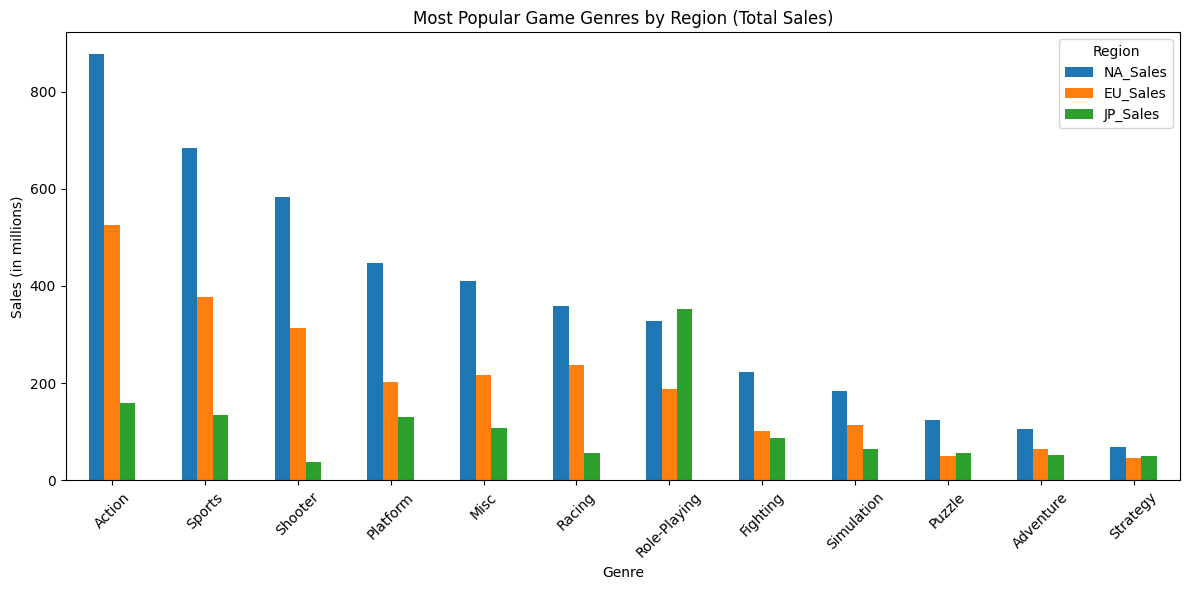

In [ ]:
# Grouping by genre and summarizing sales for each region
genre_sales = game_data.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales']].sum()

# Sorting by sales in North America
genre_sales = genre_sales.sort_values('NA_Sales', ascending=False)

# Creating the chart
genre_sales.plot(kind='bar', figsize=(12,6))
plt.title('Most Popular Game Genres by Region (Total Sales)')
plt.ylabel('Sales (in millions)')
plt.xlabel('Genre')
plt.xticks(rotation=45)
plt.legend(title='Region')
plt.tight_layout()
plt.show()

This chart shows the most popular game genres by region: North America (NA), Europe (EU), and Japan (JP). The data is grouped by genre, and total sales are calculated for each region. Then, genres are sorted based on sales in North America and displayed in the chart. This visualization makes it easy to compare genre preferences across regions, highlighting cultural differences and market-specific trends.

## **Analyzing the data to find which year had the most games released**


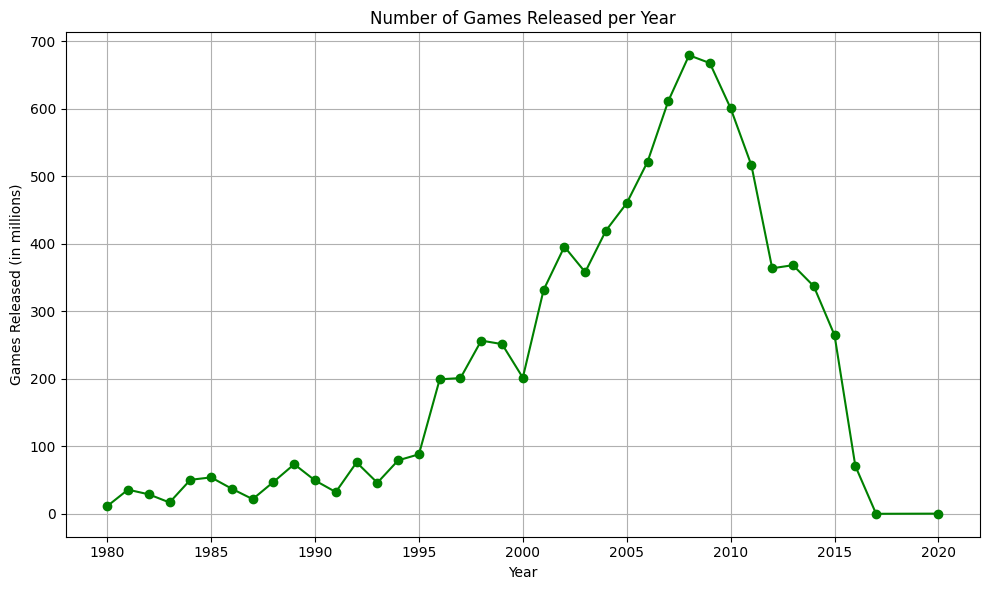

In [ ]:
# Below, we will study which year had the highest number of game releases.
# To perform this analysis, we will use the cleaned dataset that excludes rows with null year values.

sales_per_year = g_y_clean.groupby('Year')['Global_Sales'].sum()

# Visualizing with a line chart
plt.figure(figsize=(10, 6))
plt.plot(sales_per_year.index, sales_per_year.values, marker='o', linestyle='-', color='green')
plt.title('Number of Games Released per Year')
plt.xlabel('Year')
plt.ylabel('Games Released (in millions)')
plt.grid(True)
plt.tight_layout()
plt.show()

This code counts how many games were released each year, using only the data entries where the Year column is not empty. It then visualizes this information with a line chart, where the horizontal axis represents the years and the vertical axis shows the number of games released. This allows us to understand the trend of game releases over time.

From the chart, we can observe that between 2000 and 2015, there was a significant increase in the number of games released, with a clear peak during the years 2005–2010. This suggests a strong growth in the gaming industry throughout that decade (2000–2010).

# Standard deviation of global sales for each platform

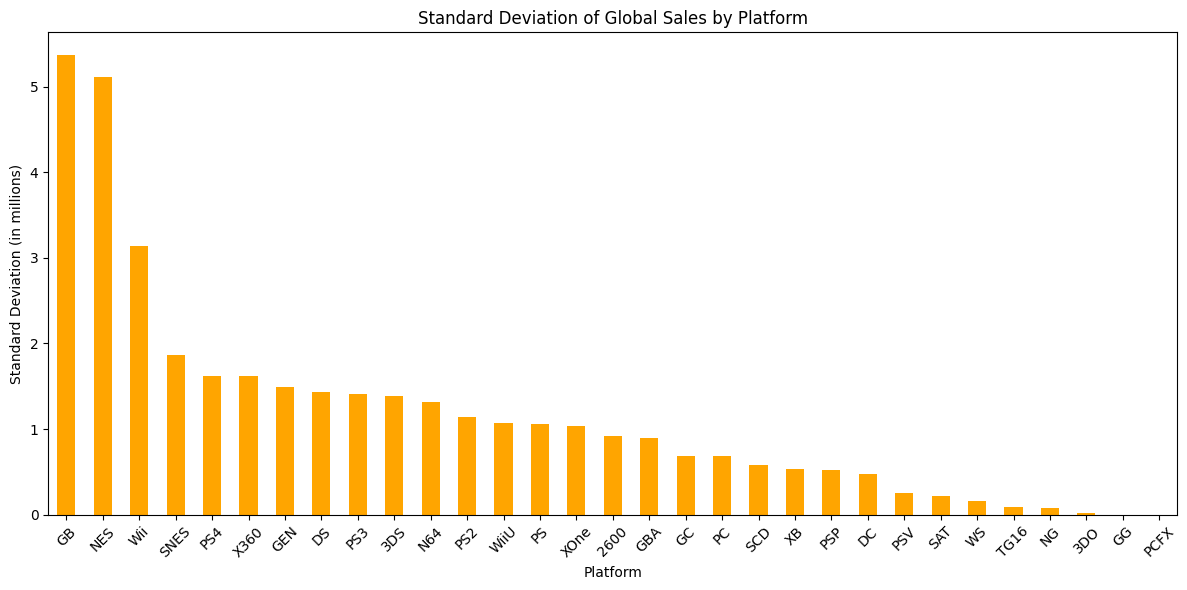

In [ ]:
# Calculate the standard deviation of global sales for each platform
std_per_platform = game_data.groupby('Platform')['Global_Sales'].std()

# Sort and visualize the results with a bar chart
std_per_platform.sort_values(ascending=False).plot(kind='bar', figsize=(12,6), color='orange')
plt.title('Standard Deviation of Global Sales by Platform')
plt.ylabel('Standard Deviation (in millions)')
plt.xlabel('Platform')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()








This chart shows how much global sales vary within each platform.

A high standard deviation, as seen for platforms like GB or NES, indicates that some games on these platforms sold much more than others, meaning there is a large spread in sales.

A low standard deviation means that sales are more consistent across games on that platform.

In summary, this chart helps us understand which platforms had more variation in game success.

# Percentage of Sales by Region


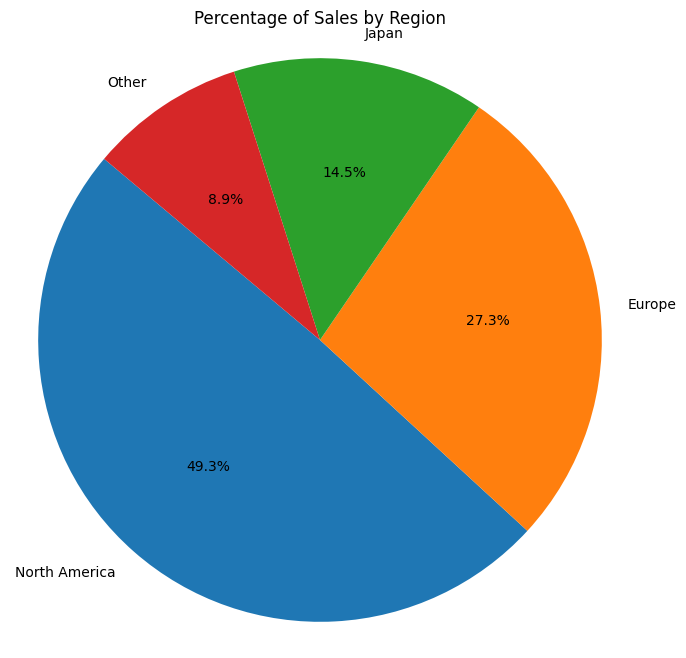

In [ ]:
# Calculate total sales per region
region_sales = {
    'North America': game_data['NA_Sales'].sum(),
    'Europe': game_data['EU_Sales'].sum(),
    'Japan': game_data['JP_Sales'].sum(),
    'Other': game_data['Other_Sales'].sum()
}

labels = region_sales.keys()
sizes = region_sales.values()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Sales by Region')
plt.axis('equal')  # makes the circle a perfect circle
plt.show()


From the pie chart, we can see that the largest market for game sales is North America (49.3%), followed by Europe (27.3%), Japan (14.5%), and Other regions (8.9%). This suggests that companies developing games may focus more on Western markets, while Asian markets like Japan, though important, account for a smaller share of global sales.

# Box plot for the distribution of sales by platform


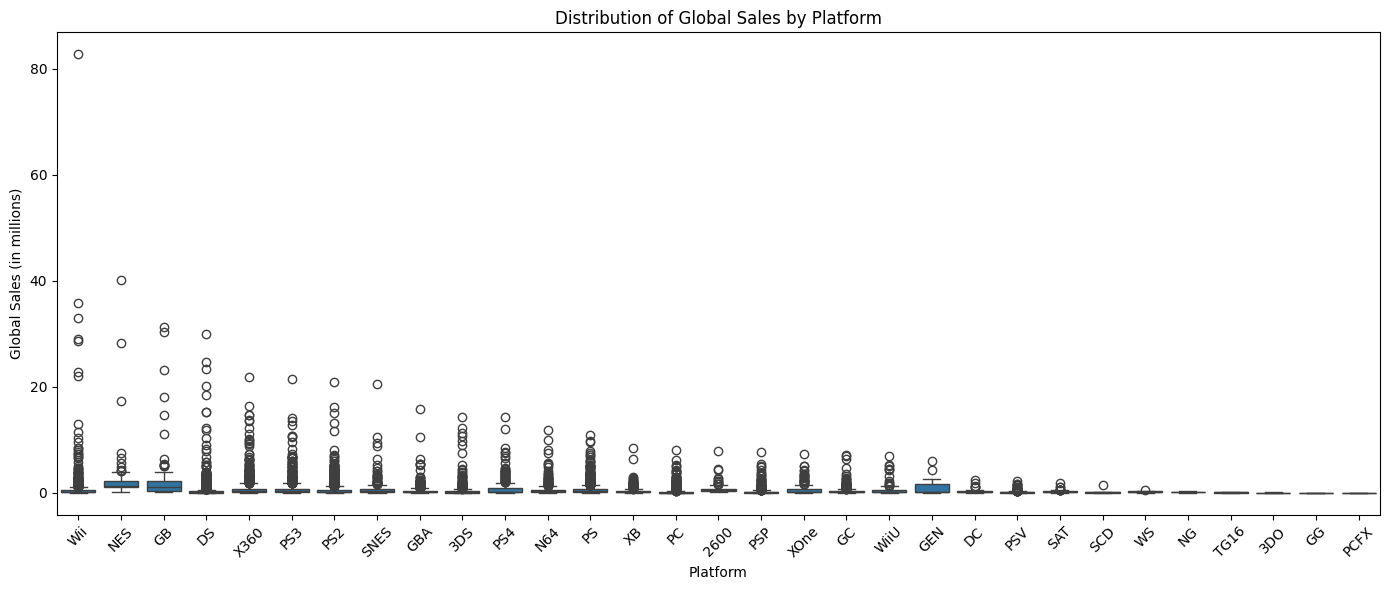

In [ ]:
plt.figure(figsize=(14, 6))
sns.boxplot(x='Platform', y='Global_Sales', data=game_data)
plt.xticks(rotation=45)
plt.title('Distribution of Global Sales by Platform')
plt.xlabel('Platform')
plt.ylabel('Global Sales (in millions)')
plt.tight_layout()
plt.show()


This chart shows how global sales are distributed for each platform.
Some platforms have a wider distribution, meaning they had games with very high sales as well as very low sales.
The presence of outliers on these platforms indicates games that dominated the market, while platforms with narrower distributions (e.g., PSP or GB) had more consistent sales but no high peaks.
This information helps understand the sales potential on each platform and the variations in commercial success across platforms.

# Box plot for the distribution of sales by genre


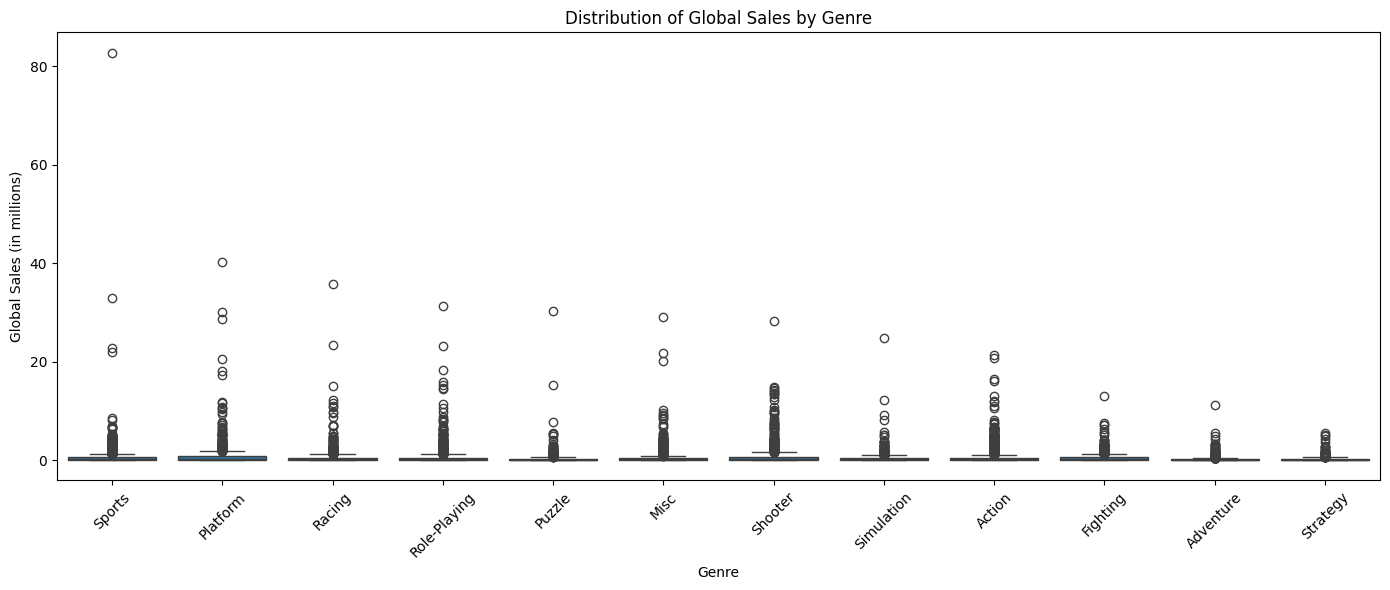

In [ ]:
plt.figure(figsize=(14, 6))
sns.boxplot(x='Genre', y='Global_Sales', data=game_data)
plt.xticks(rotation=45)
plt.title('Distribution of Global Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Global Sales (in millions)')
plt.tight_layout()
plt.show()

From this distribution, we can see that the "Sports" genre has achieved the highest sales, dominating the market with one or a few highly successful titles. In contrast, the "Strategy" genre shows the lowest sales, indicating more limited consumer interest compared to other genres.

#Study Summary

This study analyzes video game sales data across different regions and platforms to understand trends in the gaming industry. Using a dataset sourced from Kaggle, the research focuses on several key aspects:

**Game Releases Over Time:** We examined the number of games released each year and observed a peak in releases between 2005–2010, indicating significant growth in the industry during that decade.

**Top-Selling Games:**The study identifies the best-selling games globally and highlights differences in sales distribution across platforms and genres.

**Platform Analysis:** We analyzed the distribution of games and sales by platform. Major platforms dominate the market, while smaller platforms still contribute but to a lesser extent. Standard deviation of sales per platform shows where sales are highly variable versus consistent.

**Genre Preferences:** By region (NA, EU, JP), the most popular genres were identified. Sports games dominate in terms of global sales, while strategy games show lower consumer interest.

**Regional Sales:** North America represents the largest market share, followed by Europe, Japan, and other regions. This provides insights into market focus for game developers.

**Outliers and Sales Distribution:** Boxplots were used to visualize outliers and understand variability in global sales by platform and genre.

The findings provide insights into market trends, consumer preferences, and platform performance, useful for game developers, marketers, and analysts.